Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
print('transactions shape: ',transactions.shape)
transactions.head()

transactions shape:  (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
transactions.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [6]:
# change date to actual date
import datetime as dt
transactions['day_day']=pd.to_datetime(transactions['date'], format = '%d.%m.%Y').dt.date
transactions.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
day_day            object
dtype: object

In [7]:
transactions['sale'] = transactions['item_price'] * transactions['item_cnt_day']

In [8]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,999.00
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,1099.00


In [9]:
import datetime

transactions_sep = transactions[(transactions['day_day'] >=  datetime.date(2014, 9, 1))
                                &
                                 (transactions['day_day'] <  datetime.date(2014, 10, 1))
                               ]
transactions_sep = transactions_sep.sort_values(by = ['day_day'])
transactions_sep.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale
1958130,01.09.2014,20,45,3695,899.0,1.0,2014-09-01,899.0
2023634,01.09.2014,20,54,18737,399.0,1.0,2014-09-01,399.0
2022759,01.09.2014,20,54,13512,1499.0,1.0,2014-09-01,1499.0
2006988,01.09.2014,20,18,4353,1999.0,1.0,2014-09-01,1999.0
2025640,01.09.2014,20,56,7794,3198.0,1.0,2014-09-01,3198.0


In [10]:
transactions_sep.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale
2019366,30.09.2014,20,58,21877,299.0,1.0,2014-09-30,299.0
1988057,30.09.2014,20,22,17374,319.0,1.0,2014-09-30,319.0
1988063,30.09.2014,20,22,17750,2792.0,1.0,2014-09-30,2792.0
1962816,30.09.2014,20,46,6847,299.0,1.0,2014-09-30,299.0
2013912,30.09.2014,20,12,7021,9999.0,1.0,2014-09-30,9999.0


In [11]:
transactions_sep_rank = transactions_sep.groupby(['shop_id']).sum(['sale']).reset_index()
transactions_sep_rank = transactions_sep_rank.sort_values(by = ['sale'], ascending = False)
transactions_sep_rank.head()

,shop_id,date_block_num,item_id,item_price,item_cnt_day,sale
23,31,118940,66324344,4.719731e+06,8583.0,7.982852e+06
17,25,79960,43051575,3.733736e+06,6158.0,6.783338e+06
7,12,16840,8394533,1.445270e+06,3400.0,6.378335e+06
20,28,62860,32961134,3.500124e+06,4403.0,4.985847e+06
19,27,53440,25365729,3.166332e+06,4026.0,4.899292e+06


In [12]:
# YOUR CODE GOES HERE

max_revenue = transactions_sep_rank.iloc[0]['sale']# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.1999999555


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [13]:
transactions_summer = transactions[(transactions['day_day'] >=  datetime.date(2014, 6, 1))
                                &
                                 (transactions['day_day'] <  datetime.date(2014, 9, 1))
                               ]
transactions_summer = transactions_summer.sort_values(by = ['day_day'])
transactions_summer.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale
1775800,01.06.2014,17,35,4806,49.00,1.0,2014-06-01,49.00
1742429,01.06.2014,17,15,6488,411.25,1.0,2014-06-01,411.25
1751457,01.06.2014,17,54,7790,799.00,2.0,2014-06-01,1598.00
1723336,01.06.2014,17,28,3334,998.70,1.0,2014-06-01,998.70
1742443,01.06.2014,17,15,7794,3699.00,1.0,2014-06-01,3699.00


In [15]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [16]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [25]:
items.dtypes

item_name           object
item_id              int64
item_category_id     int64
dtype: object

In [18]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [19]:
transactions_summer_item = pd.merge(transactions_summer, items, on = ['item_id'])
transactions_summer_item.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale,item_name,item_category_id
0,01.06.2014,17,35,4806,49.0,1.0,2014-06-01,49.0,"Medal of Honor: Warfighter [PC, русская версия]",30
1,01.06.2014,17,47,4806,49.0,1.0,2014-06-01,49.0,"Medal of Honor: Warfighter [PC, русская версия]",30
2,01.06.2014,17,25,4806,49.0,1.0,2014-06-01,49.0,"Medal of Honor: Warfighter [PC, русская версия]",30
3,01.06.2014,17,5,4806,49.0,2.0,2014-06-01,98.0,"Medal of Honor: Warfighter [PC, русская версия]",30
4,01.06.2014,17,6,4806,49.0,1.0,2014-06-01,49.0,"Medal of Honor: Warfighter [PC, русская версия]",30


In [20]:
transactions_item_rank = transactions_summer_item.groupby(['item_category_id']).sum(['sale']).reset_index()
transactions_item_rank = transactions_item_rank.sort_values(by = ['sale'], ascending = False)
transactions_item_rank.head()

,item_category_id,date_block_num,shop_id,item_id,item_price,item_cnt_day,sale
15,20,139629,244289,51093364,2.031695e+07,12513.0,32157302.43
8,12,22660,40755,9143056,2.600355e+07,1506.0,31385229.70
14,19,305348,545363,90148474,2.389013e+07,18682.0,26237112.15
18,23,243420,460518,60449552,1.854052e+07,14677.0,19896624.03
22,30,516068,933905,178772507,1.302367e+07,34243.0,15876623.34


In [21]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = transactions_item_rank.iloc[0]['item_category_id']# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20.0


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [26]:
transactions_item = pd.merge(transactions, items, on = ['item_id'])
transactions_item.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,2013-01-02,999.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,2013-01-23,999.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,2013-01-20,999.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,2013-01-02,999.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,2013-01-03,999.0,ЯВЛЕНИЕ 2012 (BD),37


In [30]:
item_price_change = transactions_item[['item_id','item_price']].groupby('item_id').agg(np.std).reset_index()
item_price_change.columns = ['item_id','item_price_std']
item_price_change.head()

,item_id,item_price_std
0,0,NaN
1,1,0.000000
2,2,0.000000
3,3,29.698485
4,4,NaN


In [32]:
transactions_item[transactions_item['item_id'] == 4]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale,item_name,item_category_id
2576033,19.09.2014,20,54,4,58.0,1.0,2014-09-19,58.0,***КОРОБКА (СТЕКЛО) D,40


In [33]:
item_price_change.isnull().sum()

item_id              0
item_price_std    2371
dtype: int64

In [34]:
item_price_change[item_price_change['item_price_std']== 0]

,item_id,item_price_std
1,1,0.0
2,2,0.0
8,8,0.0
50,50,0.0
91,92,0.0
...,...,...
21785,22148,0.0
21793,22156,0.0
21796,22159,0.0
21802,22165,0.0


In [36]:
constant_price = item_price_change[item_price_change['item_price_std']== 0].shape[0]
constant_price

3555

In [37]:
# YOUR CODE GOES HERE

num_items_constant_price = constant_price + 2371# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [40]:
transactions.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
day_day            object
sale              float64
dtype: object

In [41]:
shop_id = 25
transactions_shop = transactions[(transactions['day_day'] >=  datetime.date(2014, 12, 1))
                                &
                                 (transactions['day_day'] <  datetime.date(2015, 1, 1))
                                 &
                                 (transactions['shop_id'] == 25)]
transactions_shop =transactions_shop.sort_values(by = ['day_day'])
transactions_shop.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale
2318118,01.12.2014,23,25,18163,349.0,2.0,2014-12-01,698.0
2317703,01.12.2014,23,25,12448,149.0,1.0,2014-12-01,149.0
2320340,01.12.2014,23,25,4336,2699.0,1.0,2014-12-01,2699.0
2321803,01.12.2014,23,25,3158,1290.0,1.0,2014-12-01,1290.0
2319880,01.12.2014,23,25,17096,149.0,1.0,2014-12-01,149.0


In [42]:
transactions_shop_return = transactions_shop[transactions_shop['item_cnt_day'] < 0]
transactions_shop_return.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale
2320516,06.12.2014,23,25,3584,1449.0,-1.0,2014-12-06,-1449.0
2322598,06.12.2014,23,25,8448,4090.0,-1.0,2014-12-06,-4090.0
2321199,06.12.2014,23,25,2637,1599.0,-1.0,2014-12-06,-1599.0
2319563,07.12.2014,23,25,16017,389.0,-1.0,2014-12-07,-389.0
2320739,14.12.2014,23,25,4997,3199.0,-1.0,2014-12-14,-3199.0


In [47]:
transactions_shop['item_lagged'] = (transactions_shop.sort_values(by=['day_day'], ascending=True)
                       .groupby(['item_id'])['item_cnt_day'].shift(-1))
transactions_shop.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale,item_lagged
2318118,01.12.2014,23,25,18163,349.0,2.0,2014-12-01,698.0,1.0
2317703,01.12.2014,23,25,12448,149.0,1.0,2014-12-01,149.0,1.0
2320340,01.12.2014,23,25,4336,2699.0,1.0,2014-12-01,2699.0,2.0
2321803,01.12.2014,23,25,3158,1290.0,1.0,2014-12-01,1290.0,1.0
2319880,01.12.2014,23,25,17096,149.0,1.0,2014-12-01,149.0,1.0


In [48]:
transactions_shop[transactions_shop['item_id'] == 3584]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale,item_lagged
2320517,02.12.2014,23,25,3584,1449.0,1.0,2014-12-02,1449.0,-1.0
2320516,06.12.2014,23,25,3584,1449.0,-1.0,2014-12-06,-1449.0,NaN


In [51]:
transactions_shop[(transactions_shop['item_id'] == 3584) & (transactions_shop['item_lagged'].isnull())]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale,item_lagged
2320516,06.12.2014,23,25,3584,1449.0,-1.0,2014-12-06,-1449.0,NaN


In [52]:
transactions_shop = transactions_shop.fillna(0)

In [53]:
transactions_shop[transactions_shop['item_id'] == 3584]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale,item_lagged
2320517,02.12.2014,23,25,3584,1449.0,1.0,2014-12-02,1449.0,-1.0
2320516,06.12.2014,23,25,3584,1449.0,-1.0,2014-12-06,-1449.0,0.0


In [54]:
transactions_shop_clean = transactions_shop[(transactions_shop['item_cnt_day'] >0)
                                           & (transactions_shop['item_lagged'] >= 0)]
transactions_shop_clean.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day_day,sale,item_lagged
2318118,01.12.2014,23,25,18163,349.0,2.0,2014-12-01,698.0,1.0
2317703,01.12.2014,23,25,12448,149.0,1.0,2014-12-01,149.0,1.0
2320340,01.12.2014,23,25,4336,2699.0,1.0,2014-12-01,2699.0,2.0
2321803,01.12.2014,23,25,3158,1290.0,1.0,2014-12-01,1290.0,1.0
2319880,01.12.2014,23,25,17096,149.0,1.0,2014-12-01,149.0,1.0


In [62]:
transactions_shop_daily = transactions_shop_clean[['day_day','item_cnt_day']].groupby(['day_day']).sum(['item_cnt_day']).reset_index()
transactions_shop_daily.head()

,day_day,item_cnt_day
0,2014-12-01,153.0
1,2014-12-02,167.0
2,2014-12-03,195.0
3,2014-12-04,163.0
4,2014-12-05,298.0


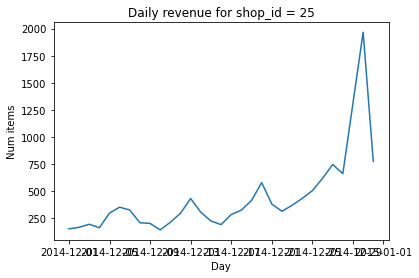

In [63]:
total_num_items_sold = transactions_shop_daily['item_cnt_day']# YOUR CODE GOES HERE
days = transactions_shop_daily['day_day']# YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

In [68]:
total_num_items_sold_var = transactions_shop_daily['item_cnt_day'].var(ddof=1)# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

Current answer for task total_num_items_sold_var is: 117289.43103448275


## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [66]:
STUDENT_EMAIL = 'yueting.yang.tue@gmail.com'# EMAIL HERE
STUDENT_TOKEN = '1UFrsA52SOyF3jwr'# TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.1999999555
Task category_id_with_max_revenue: 20.0
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 113379.78333333334


In [67]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

ConnectionError: HTTPSConnectionPool(host='hub.coursera-apps.org', port=443): Max retries exceeded with url: /api/onDemandProgrammingScriptSubmissions.v1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fcb4eec6d90>: Failed to establish a new connection: [Errno 101] Network is unreachable'))

Well done! :)